In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

In [4]:
# Load the dataset
boston=pd.read_csv('C:\\Users\\DELL\\OneDrive - Faculty of Computers and Information\\Desktop\\ML-Project\\HousingData.csv')
#boston = pd.read_csv('HousingData.csv')

In [9]:
# Split the dataset into features (X) and target variable (y)

X = boston.iloc[:, :-1]  # Select all columns except the last one
Y = boston.iloc[:, -1]   # Select only the last column


In [10]:
# Split the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [11]:
# Standardize the features to ensure that
#all features are on a similar scale and have comparable influence on the distance calculations.

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
# Fill missing values in both training and test sets with the mean from the training set
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X.columns)

x_train_scaled.fillna(x_train_scaled.mean(), inplace=True)
x_test_scaled.fillna(x_train_scaled.mean(), inplace=True)
Y_clean_train = y_train.fillna(Y.mean())

In [13]:
# Initialize the KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=9)

In [14]:
# Create a KFold cross-validator with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
# Perform cross-validation and print the mean and standard deviation of the scores
cross_val_scores = cross_val_score(knn_regressor, x_train_scaled, Y_clean_train, cv=kf, scoring='neg_mean_squared_error')

mse_scores = -cross_val_scores  # convert scores back to positive

In [16]:
#Train the model with our training data
knn_regressor.fit(x_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=9)

In [11]:
#Warning
#occurs when using scikit-learn's KNeighborsRegressor with a NumPy array for your input data (X)
#that doesn't have feature names associated with it.
#When you use a Pandas DataFrame, the column names serve as feature names, 
#but with NumPy arrays, scikit-learn might not be able to determine the feature names
#this warning doesn't affect the functionality of the model

In [17]:
# Make predictions on the test set
y_predict = knn_regressor.predict(x_test_scaled)
print(y_predict)

[24.38888889 29.98888889 17.36666667 24.28888889 16.37777778 22.4
 19.5        16.65555556 19.31111111 19.53333333 23.3        20.4
  9.58888889 23.35555556 18.92222222 20.47777778 18.4        10.84444444
 34.1        13.92222222 23.18888889 27.92222222 16.17777778 20.92222222
 16.31111111 15.37777778 22.66666667 12.27777778 23.3        20.2
 22.56666667 21.86666667 14.77777778 19.56666667 14.77777778 17.02222222
 30.47777778 20.15555556 23.3        24.07777778 19.1        29.56666667
 35.12222222 20.76666667 27.22222222 14.15555556 15.62222222 24.28888889
 19.44444444 27.07777778 21.5        30.43333333 16.63333333 22.04444444
 39.96666667 21.07777778 15.74444444 30.93333333 24.13333333 18.73333333
 23.77777778 31.42222222 26.02222222 20.26666667 24.16666667 23.3
 13.17777778 23.5        27.58888889 13.33333333 21.52222222 21.48888889
 12.72222222 21.27777778 23.06666667  8.84444444 19.94444444 35.12222222
 12.33333333 15.33333333 21.32222222 11.37777778 22.37777778 10.55555556
 20.3 

In [18]:
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64


In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [20]:
rmse = np.sqrt(np.mean(mse_scores))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 5.265119600889903


In [21]:
print(f'R^2 Score: {r2}')

R^2 Score: 0.6639535203453786


In [22]:
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation MSE: {np.std(mse_scores)}')


Mean MSE: 27.72148441167505
Standard Deviation MSE: 8.835176170916254


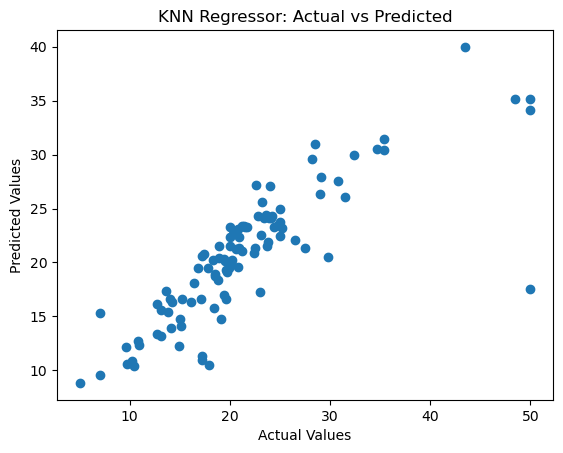

In [24]:
# Visualize the results
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regressor: Actual vs Predicted')
plt.show()